In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

In [82]:
serial = 7511

In [83]:
def power_level(x, y):
    x, y = x+1, y+1
    rack_id = x + 10
    power = rack_id * y
    power += serial
    power *= rack_id
    power = (power // 100) % 10
    return power - 5

In [84]:
grid = np.fromfunction(power_level, (300, 300))

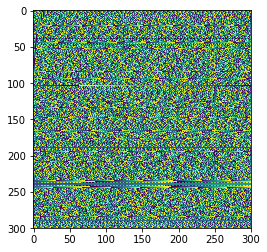

In [85]:
plt.imshow(grid)

In [90]:
k_size = 3
kernel = np.ones((k_size, k_size))
kernel

sums = convolve(grid, kernel, mode="same")
x, y = np.where(sums == sums.max())
x, y = x[0] - k_size // 2 + 1, y[0] - k_size // 2 + 1

x, y

C:\Users\Lukas\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


(21, 22)

# Part 2

In [93]:
curr_max = None
curr_sol = ""
for k_size in range(1, 300):
    kernel = np.ones((k_size, k_size))
    sums = convolve(grid, kernel, mode="same")
    m = sums.max()
    if curr_max is None or m > curr_max:
        curr_max = m
        x, y = np.where(sums == sums.max())
        x, y = x[0] - k_size // 2 + 1, y[0] - k_size // 2 + 1
        curr_sol = f"{x},{y},{k_size}"
        x, y

C:\Users\Lukas\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


In [94]:
curr_sol

'235,288,13'